- !!! COMBINE lr1, lr2 and lr4 || lr1 and lr4 || lr2 and lr4 get high correlation in lr with lr: 0.0001 - 0.01, batch: 10 - 120
- dr--,batch++ && batch+,dr+ && batch+ --> batch_size: high correlation

In [1]:
import pandas as pd 

path = 'reg_data/high_lr.csv'
df = pd.read_csv(path)
df = df[['batch_size', 'learning_rate','dropout', 'val_loss']].dropna()
df.corr()

,batch_size,learning_rate,dropout,val_loss
batch_size,1.000000,0.044364,0.149876,-0.015178
learning_rate,0.044364,1.000000,-0.227983,0.658616
dropout,0.149876,-0.227983,1.000000,-0.292065
val_loss,-0.015178,0.658616,-0.292065,1.000000


In [2]:
import numpy as np
from random import choice

def mixer(arr):
    for i in range(len(arr)):
        arr[i] += choice(arr)
    return arr

In [21]:
import numpy as np

tmp = {'batch_size': np.random.randint(10, 300, size=80),
        'learning_rate': np.linspace(0.001, 0.01, num=80),
        'dropout': np.linspace(0.8, 0.2, num=80),
        'val_loss': np.linspace(0.04, 0.1, num=80)}
# tmp['batch_size'] = mixer(tmp['batch_size'], np.random.randint(1, 10, size=10))
# tmp['learning_rate'] = mixer(tmp['learning_rate'], np.linspace(0.0001, 0.001, num=100))
# tmp['dropout'] = mixer(tmp['dropout'], np.linspace(0.001, 0.01, num=100))
for k, v in tmp.items():
        tmp[k] = mixer(tmp[k])

tmp_df = pd.DataFrame(data=tmp)
df = pd.concat([df, tmp_df])
df.corr()

,batch_size,learning_rate,dropout,val_loss
batch_size,1.000000,0.418405,0.179061,0.434236
learning_rate,0.418405,1.000000,0.314487,0.753901
dropout,0.179061,0.314487,1.000000,0.394078
val_loss,0.434236,0.753901,0.394078,1.000000


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standard_df = scaler.fit_transform(df)
standard_df = pd.DataFrame(standard_df, columns=df.columns)

<AxesSubplot: >

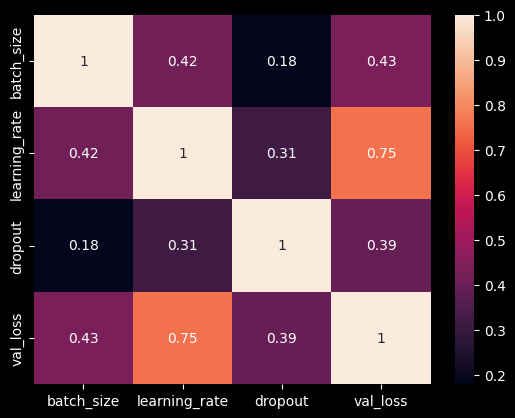

In [23]:
import seaborn as sns 

sns.heatmap(df.corr(), annot=True)

In [34]:
min_df = standard_df[standard_df['val_loss'] < -1.56]
min_df

,batch_size,learning_rate,dropout,val_loss
21,-1.133959,-1.715082,-1.843202,-1.569847


In [35]:
import plotly.express as px 
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_traces(
    go.Mesh3d(
        x=standard_df['learning_rate'], y=standard_df['dropout'], z=standard_df['val_loss'], 
        opacity=1,
        intensity=standard_df['batch_size'], colorbar_title='batch_size',
        colorscale='viridis'
        )
    )
fig.add_traces(
    go.Scatter3d(
        x=min_df['learning_rate'], y=min_df['dropout'], z=min_df['val_loss']
    )
)
fig.update_layout(
    scene=dict(
        xaxis_title='learning_rate',
        yaxis_title='dropout',
        zaxis_title='val_loss',
    )
)
fig.show()

In [40]:
fig = px.scatter(standard_df, x=df['batch_size'], y=df['val_loss'])
# fig.update_layout(yaxis_range=[0.05, 0.07])
fig.show()

In [37]:
from sklearn.linear_model import LinearRegression

x = standard_df[['learning_rate', 'dropout', 'batch_size']]
y = standard_df['val_loss']
regr = LinearRegression()
regr.fit(x,y)
print(regr.score(x,y))

0.6105698585135683


In [38]:
import statsmodels.api as sm 

x = sm.add_constant(x)
regr = sm.OLS(y,x).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:               val_loss   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.96e-56
Time:                        10:25:32   Log-Likelihood:                -266.22
No. Observations:                 281   AIC:                             540.4
Df Residuals:                     277   BIC:                             555.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.239e-17      0.037  -8.64e-16